In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

input_dir = 'exercise'
output_dir = 'output'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [13]:
def inverse_image(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    norm = img / 255.0
    corrected = np.power(norm, gamma)
    return np.uint8(corrected * 255)

def log_transform(img):
    # Chuyển ảnh sang float để tính log chính xác
    img_float = img.astype(np.float32)

    # Áp dụng logarit tự nhiên: log(1 + pixel)
    log_image = np.log1p(img_float)

    # Chuẩn hóa giá trị về khoảng [0, 255]
    log_image = cv2.normalize(log_image, None, 0, 255, cv2.NORM_MINMAX)

    # Chuyển về kiểu nguyên 8-bit
    return np.uint8(log_image)


def histogram_equalization(img):
    if len(img.shape) == 2:
        return cv2.equalizeHist(img)
    else:
        ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
        ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
        return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

def contrast_stretching(img):
    in_min = np.min(img)
    in_max = np.max(img)
    stretched = (img - in_min) * (255 / (in_max - in_min))
    return np.uint8(stretched)

=== Image Transformation Menu ===
I - Inverse
G - Gamma Correction
L - Log Transform
H - Histogram Equalization
C - Contrast Stretching
Đang áp dụng: Log Transform


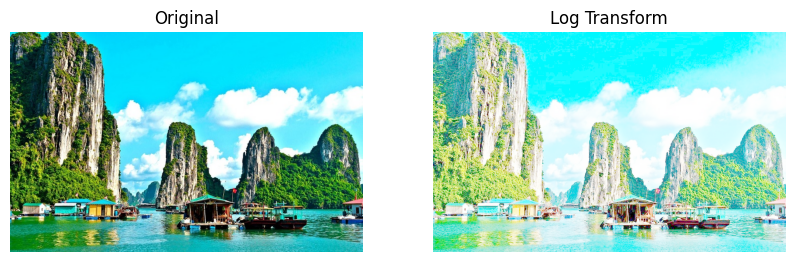

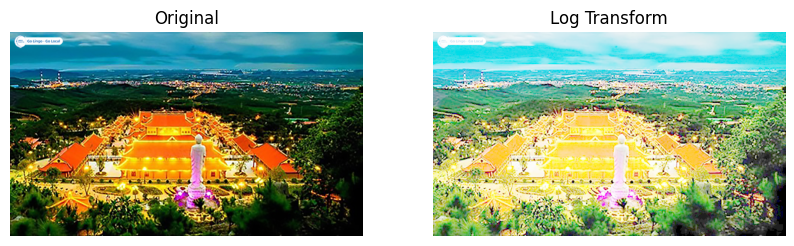

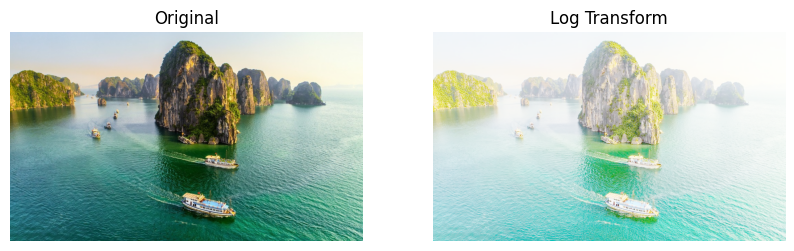

✅ Ảnh đã lưu tại thư mục: 'output'


In [14]:
transformations = {
    'I': ('Inverse', inverse_image),
    'G': ('Gamma Correction', gamma_correction),
    'L': ('Log Transform', log_transform),
    'H': ('Histogram Equalization', histogram_equalization),
    'C': ('Contrast Stretching', contrast_stretching)
}

print("=== Image Transformation Menu ===")
for key, (name, _) in transformations.items():
    print(f"{key} - {name}")

choice = input("Nhập lựa chọn của bạn (I/G/L/H/C): ").upper()

if choice not in transformations:
    print("Lựa chọn không hợp lệ.")
else:
    name, transform_fn = transformations[choice]
    print(f"Đang áp dụng: {name}")

    for filename in os.listdir(input_dir):
        if filename.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp')):
            path = os.path.join(input_dir, filename)
            img = cv2.imread(path)

            result = transform_fn(img)
            out_path = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}_{choice}.png")
            cv2.imwrite(out_path, result)

            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

            plt.figure(figsize=(10, 4))
            plt.subplot(1, 2, 1)
            plt.imshow(img_rgb)
            plt.title("Original")
            plt.axis("off")

            plt.subplot(1, 2, 2)
            plt.imshow(result_rgb)
            plt.title(name)
            plt.axis("off")
            plt.show()

    print(f"✅ Ảnh đã lưu tại thư mục: '{output_dir}'")